In [1]:
import pandas as pd
import os
from get_repo_name import get_repo_name

repo_name = get_repo_name ( os.path.basename ( os.getcwd() ) )
dataset_path = f'datasets/{repo_name}_groupedby_yearmonth.csv'
df = pd.read_csv (dataset_path)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2013-11,21,3028,51,0.0,0.0,0.0,NaN,NaN,NaN
1,2013-12,13,660,45,0.0,0.0,0.0,NaN,NaN,NaN
2,2014-01,14,3299,91,3079.0,1686.0,39555.0,0.665134,0.7773,0.944937
3,2014-02,29,1465,481,0.0,0.0,0.0,NaN,NaN,NaN
4,2014-03,50,2102,520,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
66,2022-02,4,155,15,0.0,0.0,0.0,NaN,NaN,NaN
67,2022-03,1,6,6,0.0,0.0,0.0,NaN,NaN,NaN
68,2022-04,2,14,13,0.0,0.0,0.0,NaN,NaN,NaN
69,2022-07,39,4654,884,0.0,0.0,0.0,NaN,NaN,NaN


In [2]:
df['dmm_unit_size'] = df['dmm_unit_size'].fillna(0)
df['dmm_unit_complexity'] = df['dmm_unit_complexity'].fillna(0)
df['dmm_unit_interfacing'] = df['dmm_unit_interfacing'].fillna(0)

In [3]:
start_date = df.year_month[0][5:7] + '-01-' + df.year_month[0][0:4]
end_date = df.year_month[len(df.year_month) - 1][5:7] + '-01-' + df.year_month[len(df.year_month) - 1][0:4]
dfperiod = pd.period_range(start_date, end_date, freq='M')

def new_zero_row ( year_month ):
    
    new_row = {
        'year_month': year_month,
        'commit_count': 0,
        'additions': 0,
        'deletions': 0,
        'agg_loc': 0,
        'agg_complexity': 0,
        'agg_token_count': 0,
        'dmm_unit_size': 0,
        'dmm_unit_complexity': 0,
        'dmm_unit_interfacing': 0
    }
    
    return new_row

for year_month in dfperiod:
    if df [ ( df['year_month'] == str(year_month) ) ].shape[0] == 0:
        df = df.append ( new_zero_row(year_month), ignore_index = True )

df.shape

(106, 10)

In [4]:
df['year_month'] = df['year_month'].astype(str)
df = df.sort_values ( by=['year_month'] )
df.reset_index(drop=True, inplace=True)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2013-11,21,3028,51,0.0,0.0,0.0,0.000000,0.0000,0.000000
1,2013-12,13,660,45,0.0,0.0,0.0,0.000000,0.0000,0.000000
2,2014-01,14,3299,91,3079.0,1686.0,39555.0,0.665134,0.7773,0.944937
3,2014-02,29,1465,481,0.0,0.0,0.0,0.000000,0.0000,0.000000
4,2014-03,50,2102,520,0.0,0.0,0.0,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...
101,2022-04,2,14,13,0.0,0.0,0.0,0.000000,0.0000,0.000000
102,2022-05,0,0,0,0.0,0.0,0.0,0.000000,0.0000,0.000000
103,2022-06,0,0,0,0.0,0.0,0.0,0.000000,0.0000,0.000000
104,2022-07,39,4654,884,0.0,0.0,0.0,0.000000,0.0000,0.000000


In [5]:
df.to_csv ( f'datasets/{repo_name}_final.csv', index = False )

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sb

def plot_line ( yplot, idx ):

    covid_proxy_ym = '2020-03'
    fig, ax = plt.subplots ( figsize = (24, 8) )
    ax.plot ( df['year_month'], df[yplot], color = 'purple' )
    ax.axvline ( x = covid_proxy_ym, linewidth=2, color='r', label = 'Initial Covid-19 Lockdowns' )
    
    ax.set_title ( repo_name + ': month vs ' + yplot, fontsize = 20 )
    ax.set_xlabel ( 'month', fontsize = 15 )
    ax.set_ylabel ( yplot, fontsize = 15 )
    ax.legend()
    
    plt.setp ( ax.get_xticklabels(), fontsize = 12 )
    plt.setp ( ax.get_yticklabels(), fontsize = 12 )
    
    locator = mdate.MonthLocator()
    plt.gca().xaxis.set_major_locator(locator)
    plt.gcf().autofmt_xdate()
    plt.gcf().autofmt_xdate()
    plt.savefig ( f'images/{idx}. {yplot}.jpg', bbox_inches = 'tight' )

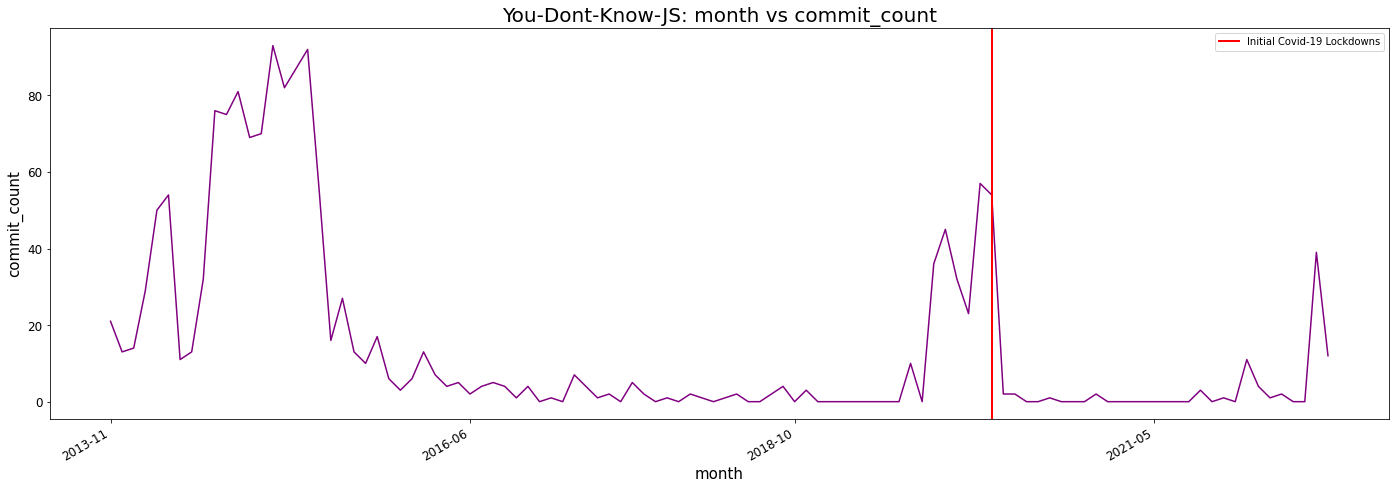

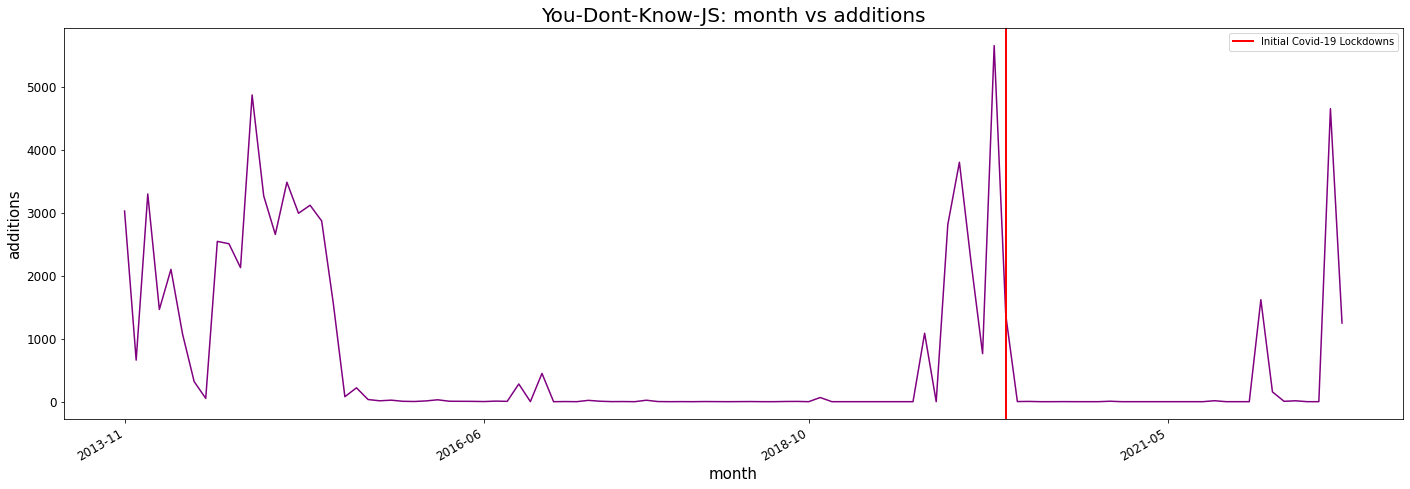

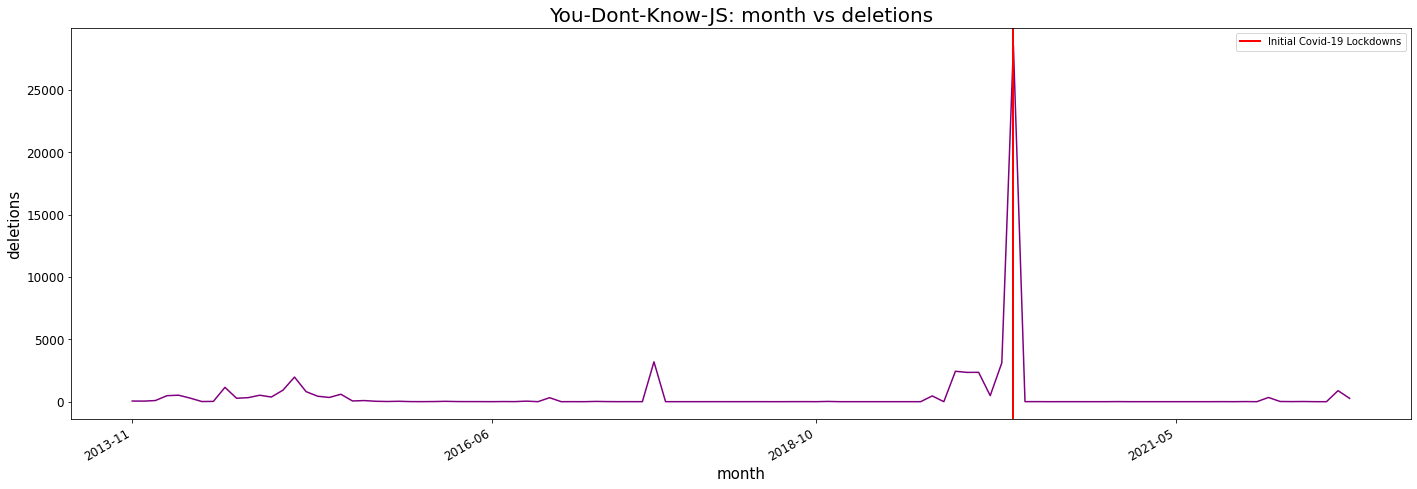

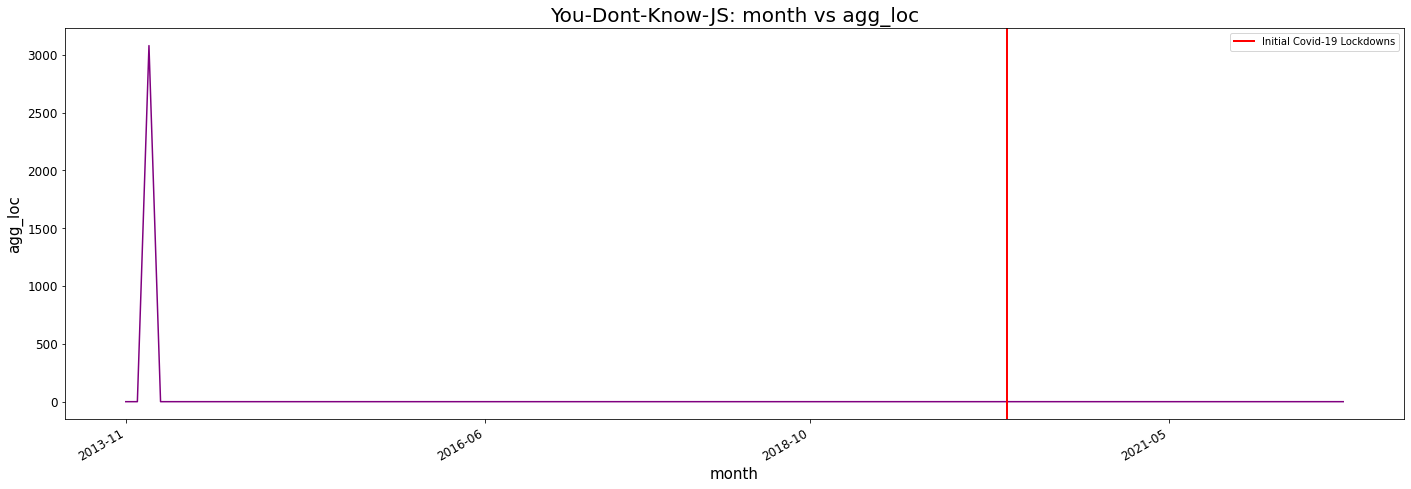

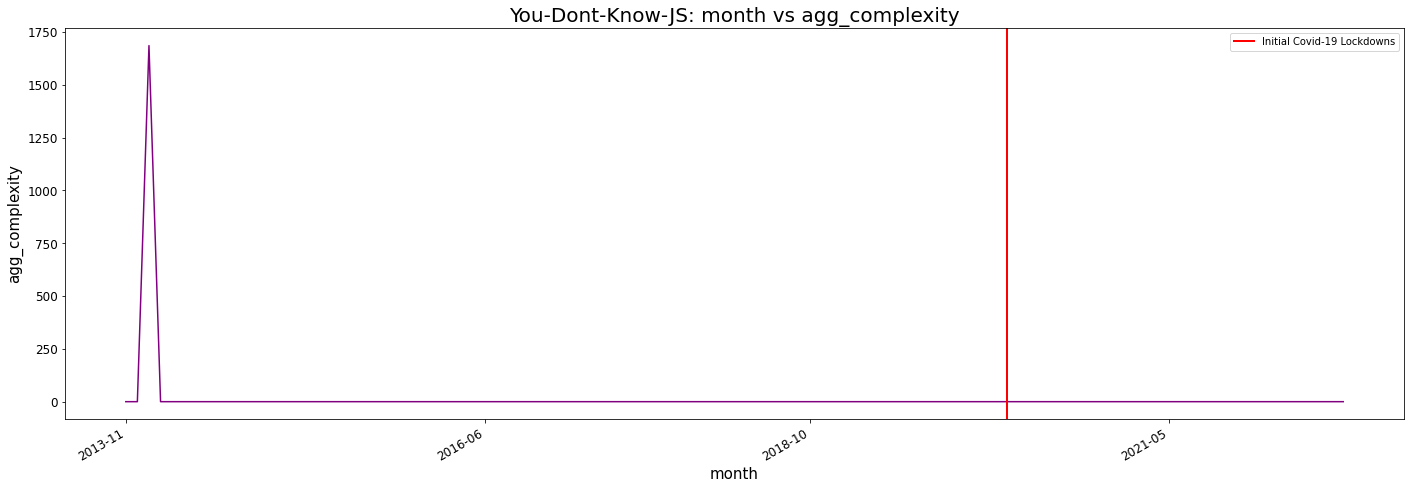

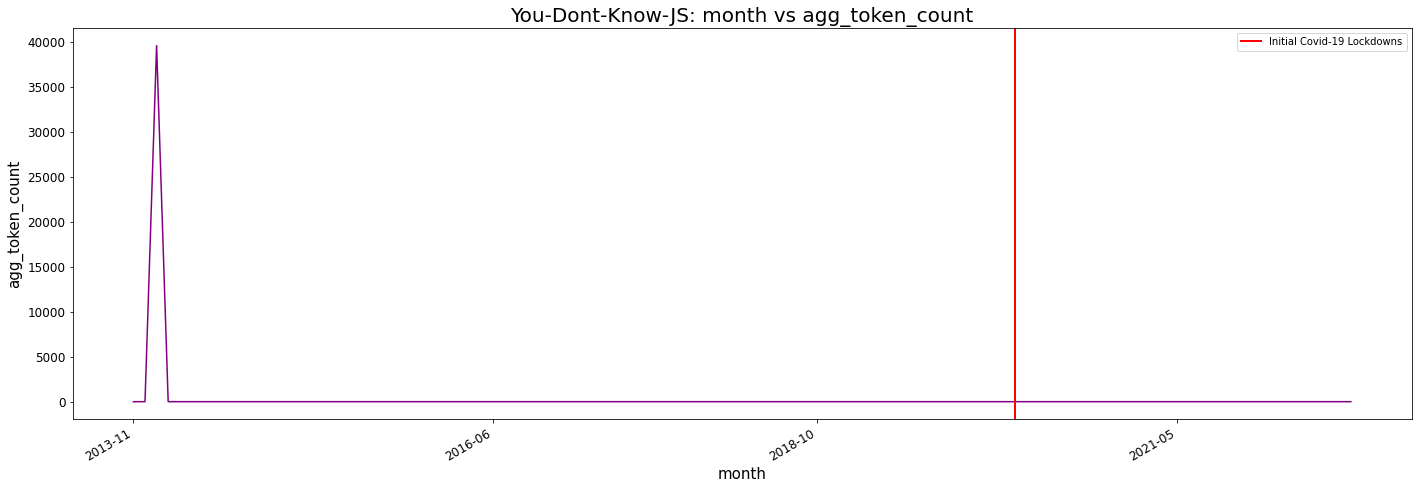

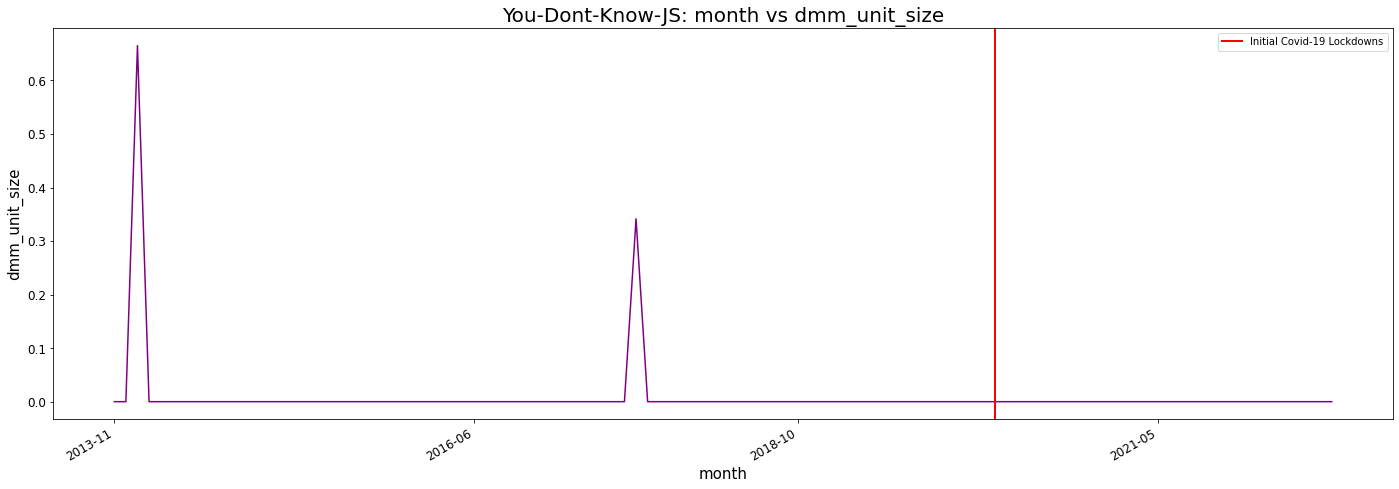

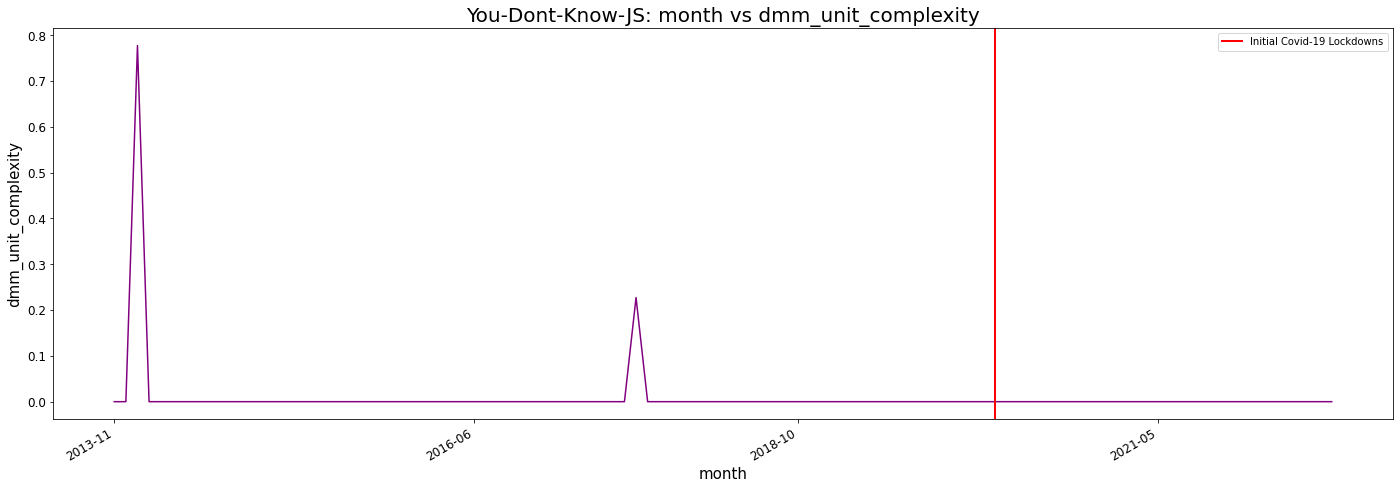

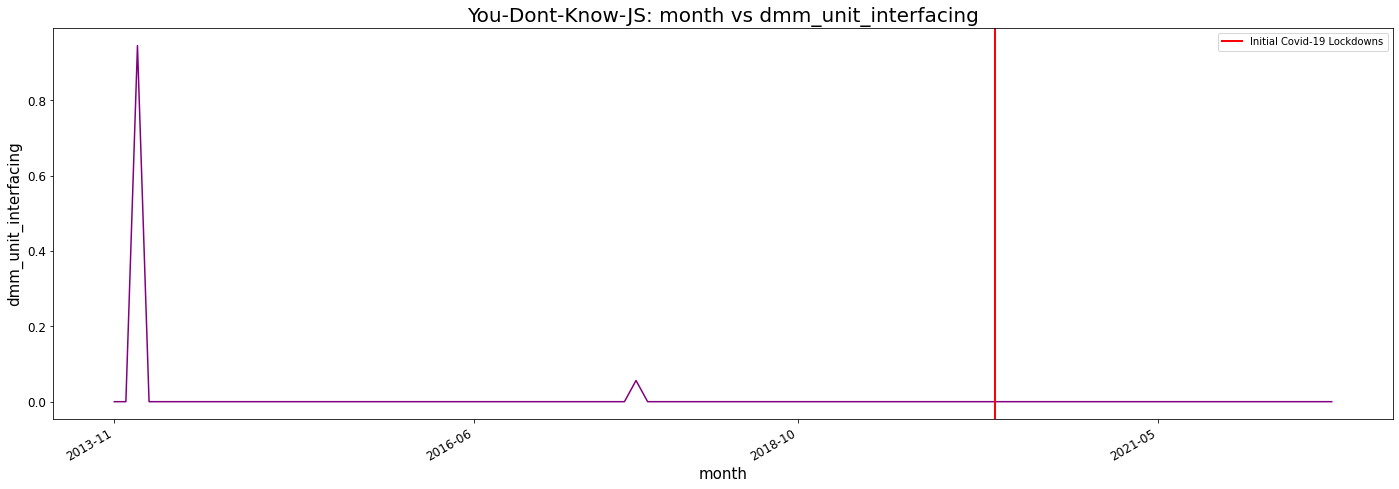

In [7]:
for idx in range ( 1, len(df.columns) ):
    plot_line ( df.columns[idx], idx )